In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:05<00:00, 23.2MB/s]
100% 2.70G/2.70G [02:05<00:00, 23.2MB/s]


In [ ]:
from zipfile import ZipFile

dataset = '/content/new-plant-diseases-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

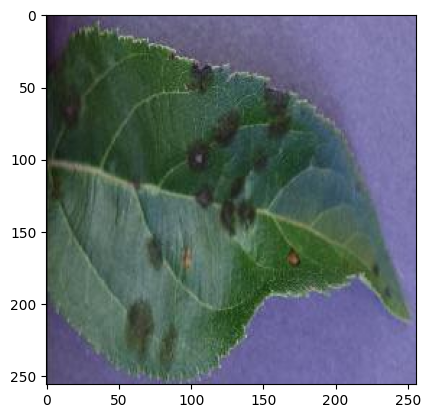

In [ ]:
img = mpimg.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
valid = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
cnn = tf.keras.models.Sequential()


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
!pip install tf_keras

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=train,validation_data=valid,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 169s 70ms/step - accuracy: 0.3987 - loss: 2.1430 - val_accuracy: 0.8484 - val_loss: 0.4807
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 68ms/step - accuracy: 0.8378 - loss: 0.5161 - val_accuracy: 0.8985 - val_loss: 0.3191
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 195s 65ms/step - accuracy: 0.9070 - loss: 0.2923 - val_accuracy: 0.9272 - val_loss: 0.2223
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 205s 66ms/step - accuracy: 0.9368 - loss: 0.1933 - val_accuracy: 0.9361 - val_loss: 0.1905
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 203s 67ms/step - accuracy: 0.9540 - loss: 0.1447 - val_accuracy: 0.9609 - val_loss: 0.1208
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9616 - loss: 0.1148 - val_accuracy: 0.9071 - val_loss: 0.2867
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9686 - loss: 0.0952 - val_accuracy: 0.9231 - val_loss: 0.2504
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 

Over and Under fitting check

In [ ]:
train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9871 - loss: 0.0414
Training accuracy: [0.03964093327522278, 0.9875951409339905]


In [ ]:
val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9640 - loss: 0.1161
Validation accuracy: [0.12320003658533096, 0.9622695446014404]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
plant_model = '/content/drive/MyDrive/your_folder/training_history.keras'
cnn.save(plant_model)


In [ ]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
loaded_model = tf.keras.models.load_model(plant_model)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


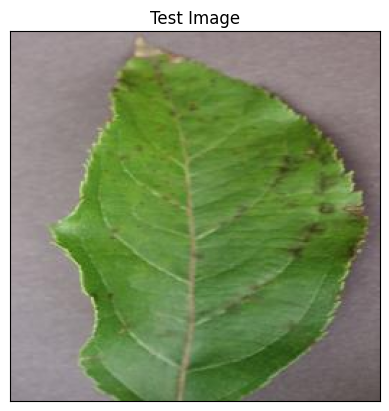

In [ ]:
import cv2
image_path = '/content/test/test/AppleScab1.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = loaded_model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


In [ ]:
print(predictions)

[[9.99240875e-01 1.04475317e-08 3.71276599e-07 1.79590206e-05
  3.41275808e-09 1.06028017e-06 2.97027043e-08 1.93243057e-08
  2.18578818e-11 4.01704412e-08 3.90736749e-10 7.41794004e-09
  4.73128654e-11 2.42684657e-11 3.22753465e-07 5.35423576e-04
  1.04265906e-04 6.62837829e-09 4.23709388e-08 1.26832481e-06
  2.01986849e-09 2.21440096e-05 4.66130103e-08 4.14345586e-10
  2.99398941e-08 1.22994365e-07 6.73396716e-09 6.14086488e-08
  1.79152607e-07 4.68725432e-08 8.86176053e-07 1.96499705e-08
  7.47982194e-05 9.61876689e-10 1.36623246e-08 3.71213171e-09
  1.59314714e-11 3.98051796e-08]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


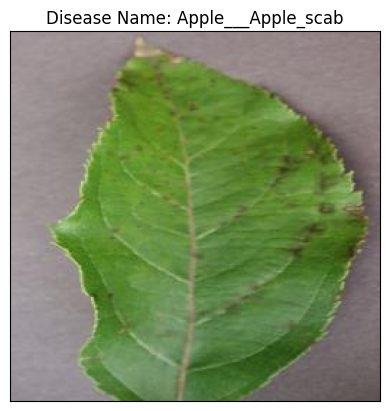

In [ ]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()